In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('kidney_disease.csv')
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


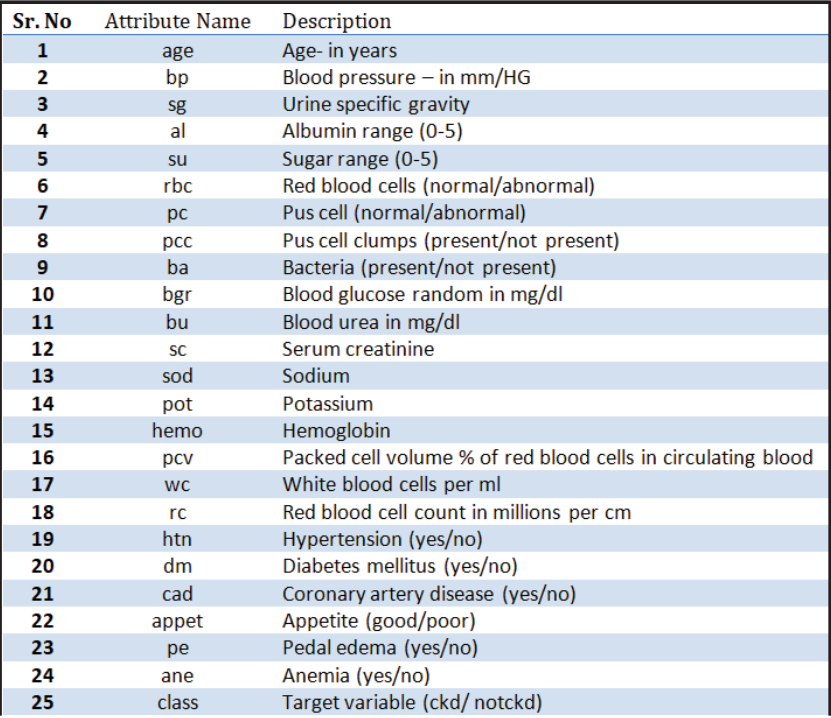

In [4]:
data=data.drop('id',axis=1)

In [5]:
data.shape

(400, 25)

In [6]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

# Replacing categorical values with numbers

In [10]:
#rbc
data['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [11]:
data['rbc']=data['rbc'].replace(to_replace={'normal':0, 'abnormal':1})

In [12]:
#pc
data['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [13]:
data['pc']=data['pc'].replace(to_replace={'normal':0, 'abnormal':1})

In [14]:
#pcc
data['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [15]:
data['pcc']=data['pcc'].replace(to_replace={'notpresent':0, 'present':1})

In [16]:
#ba
data['ba'].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [17]:
data['ba']=data['ba'].replace(to_replace={'notpresent':0, 'present':1})

In [18]:
#htn
data['htn'].value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [19]:
data['htn']=data['htn'].replace(to_replace={'no':0, 'yes':1})

In [20]:
#dm
data['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [21]:
data['dm']=data['dm'].replace(to_replace={'\tyes':'yes', ' yes':'yes', '\tno':'no'})

In [22]:
data['dm']=data['dm'].replace(to_replace={'yes': 1, 'no': 0})

In [23]:
#cad
data['cad'].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [24]:
data['cad']=data['cad'].replace(to_replace={'\tno':'no'})

In [25]:
data['cad']=data['cad'].replace(to_replace={'no':0, 'yes':1})

In [26]:
#appet
data['appet'].unique()

array(['good', 'poor', nan], dtype=object)

In [27]:
data['appet']=data['appet'].replace(to_replace={'poor':0, 'good':1, 'no':np.nan})

In [28]:
#pe
data['pe'].value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [29]:
data['pe']=data['pe'].replace(to_replace={'no':0, 'yes':1})

In [30]:
#ane
data['ane'].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [31]:
data['ane']=data['ane'].replace(to_replace={'no':0, 'yes':1})

In [32]:
#classification
data['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [33]:
data['classification']=data['classification'].replace(to_replace={'ckd\t':'ckd'})

In [34]:
data['classification']= [1 if i=="ckd" else 0 for i in data['classification']]

In [35]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [36]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

# Converting object values into numeric values

In [37]:
data['pcv']=pd.to_numeric(data['pcv'],errors='coerce')
data['wc']=pd.to_numeric(data['wc'],errors='coerce')
data['rc']=pd.to_numeric(data['rc'],errors='coerce')

In [38]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [39]:
data.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
data.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

# Data Cleaning

In [41]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [42]:
features = ['age','bp','sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']

In [43]:
#Find the k neighbors of missing value using distance metric and then replace the missing value with their mean/median 
from sklearn.impute import KNNImputer
knn_missing_values_imputer=KNNImputer(n_neighbors=5)
data[features] = pd.DataFrame(knn_missing_values_imputer.fit_transform(data[features]),columns=features)
print("Are there any missing values in Features?\n",data[features].isna().any())
print("After filling the feature classes are: \n",data[features])

Are there any missing values in Features?
 age      False
bp       False
sg       False
al       False
su       False
rbc      False
pc       False
pcc      False
ba       False
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wc       False
rc       False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
dtype: bool
After filling the feature classes are: 
       age    bp     sg   al   su  rbc   pc  pcc   ba    bgr    bu   sc    sod  \
0    48.0  80.0  1.020  1.0  0.0  0.2  0.0  0.0  0.0  121.0  36.0  1.2  137.6   
1     7.0  50.0  1.020  4.0  0.0  0.4  0.0  0.0  0.0  113.0  18.0  0.8  136.8   
2    62.0  80.0  1.010  2.0  3.0  0.0  0.0  0.0  0.0  423.0  53.0  1.8  133.8   
3    48.0  70.0  1.005  4.0  0.0  0.0  1.0  1.0  0.0  117.0  56.0  3.8  111.0   
4    51.0  80.0  1.010  2.0  0.0  0.0  0.0  0.0  0.0  106.0  26.0  1.4  138.4   
..    ...   ...    ...  ...  ...  ...  ...  ...  ...    ..

# Scaling

In [44]:
features = data.iloc[:, :-1]
target=data.iloc[:,-1]

In [45]:
#Divide each value of a feature with the maximum value that is present and use that scalar for the testing 
from sklearn.preprocessing import MaxAbsScaler
from sklearn import preprocessing

scaled_features = MaxAbsScaler().fit_transform(features)
x = pd.DataFrame(scaled_features,columns = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'])
print("Dataset after scaling:\n ", scaled_features)

Dataset after scaling:
  [[0.53333333 0.44444444 0.99512195 ... 1.         0.         0.        ]
 [0.07777778 0.27777778 0.99512195 ... 1.         0.         0.        ]
 [0.68888889 0.44444444 0.98536585 ... 0.         0.         1.        ]
 ...
 [0.13333333 0.44444444 0.99512195 ... 1.         0.         0.        ]
 [0.18888889 0.33333333 1.         ... 1.         0.         0.        ]
 [0.64444444 0.44444444 1.         ... 1.         0.         0.        ]]


# Data Balancing

C:\Users\Sun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classification', ylabel='count'>

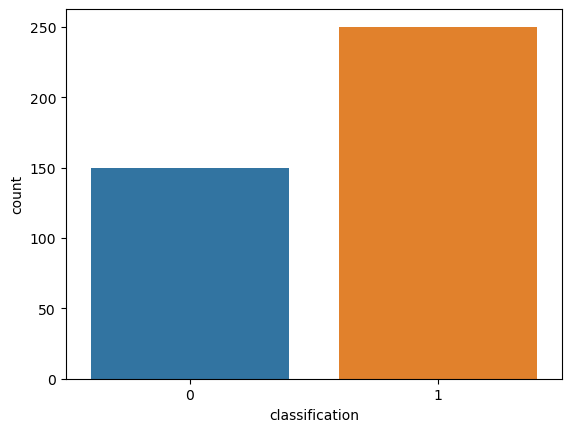

In [46]:
sns.countplot(data['classification'])

In [47]:
#Synthetic Minority Over Sampling Technique. 
#it generates synthetic samples for the minority class to balance the class distribution.
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(x,target)
print("Datset is balanced using SMOTE technique")
print("Feature classes: ",X)
print("Target classes: ", y)

Datset is balanced using SMOTE technique
Feature classes:            age        bp        sg   al   su  rbc   pc  pcc   ba       bgr  \
0    0.533333  0.444444  0.995122  0.2  0.0  0.2  0.0  0.0  0.0  0.246939   
1    0.077778  0.277778  0.995122  0.8  0.0  0.4  0.0  0.0  0.0  0.230612   
2    0.688889  0.444444  0.985366  0.4  0.6  0.0  0.0  0.0  0.0  0.863265   
3    0.533333  0.388889  0.980488  0.8  0.0  0.0  1.0  1.0  0.0  0.238776   
4    0.566667  0.444444  0.985366  0.4  0.0  0.0  0.0  0.0  0.0  0.216327   
..        ...       ...       ...  ...  ...  ...  ...  ...  ...       ...   
495  0.240834  0.398265  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.241001   
496  0.468295  0.371728  0.998493  0.0  0.0  0.0  0.0  0.0  0.0  0.187125   
497  0.327251  0.414033  0.997330  0.0  0.0  0.0  0.0  0.0  0.0  0.217620   
498  0.687718  0.365496  0.995122  0.0  0.0  0.0  0.0  0.0  0.0  0.211708   
499  0.605850  0.444444  1.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.227650   

           bu   

In [48]:
X['classification'] = y
dataset =X

C:\Users\Sun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classification', ylabel='count'>

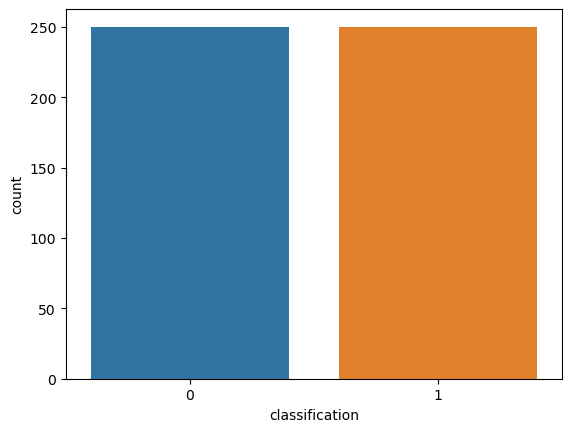

In [49]:
sns.countplot(dataset['classification'])

# Heatmap

 Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

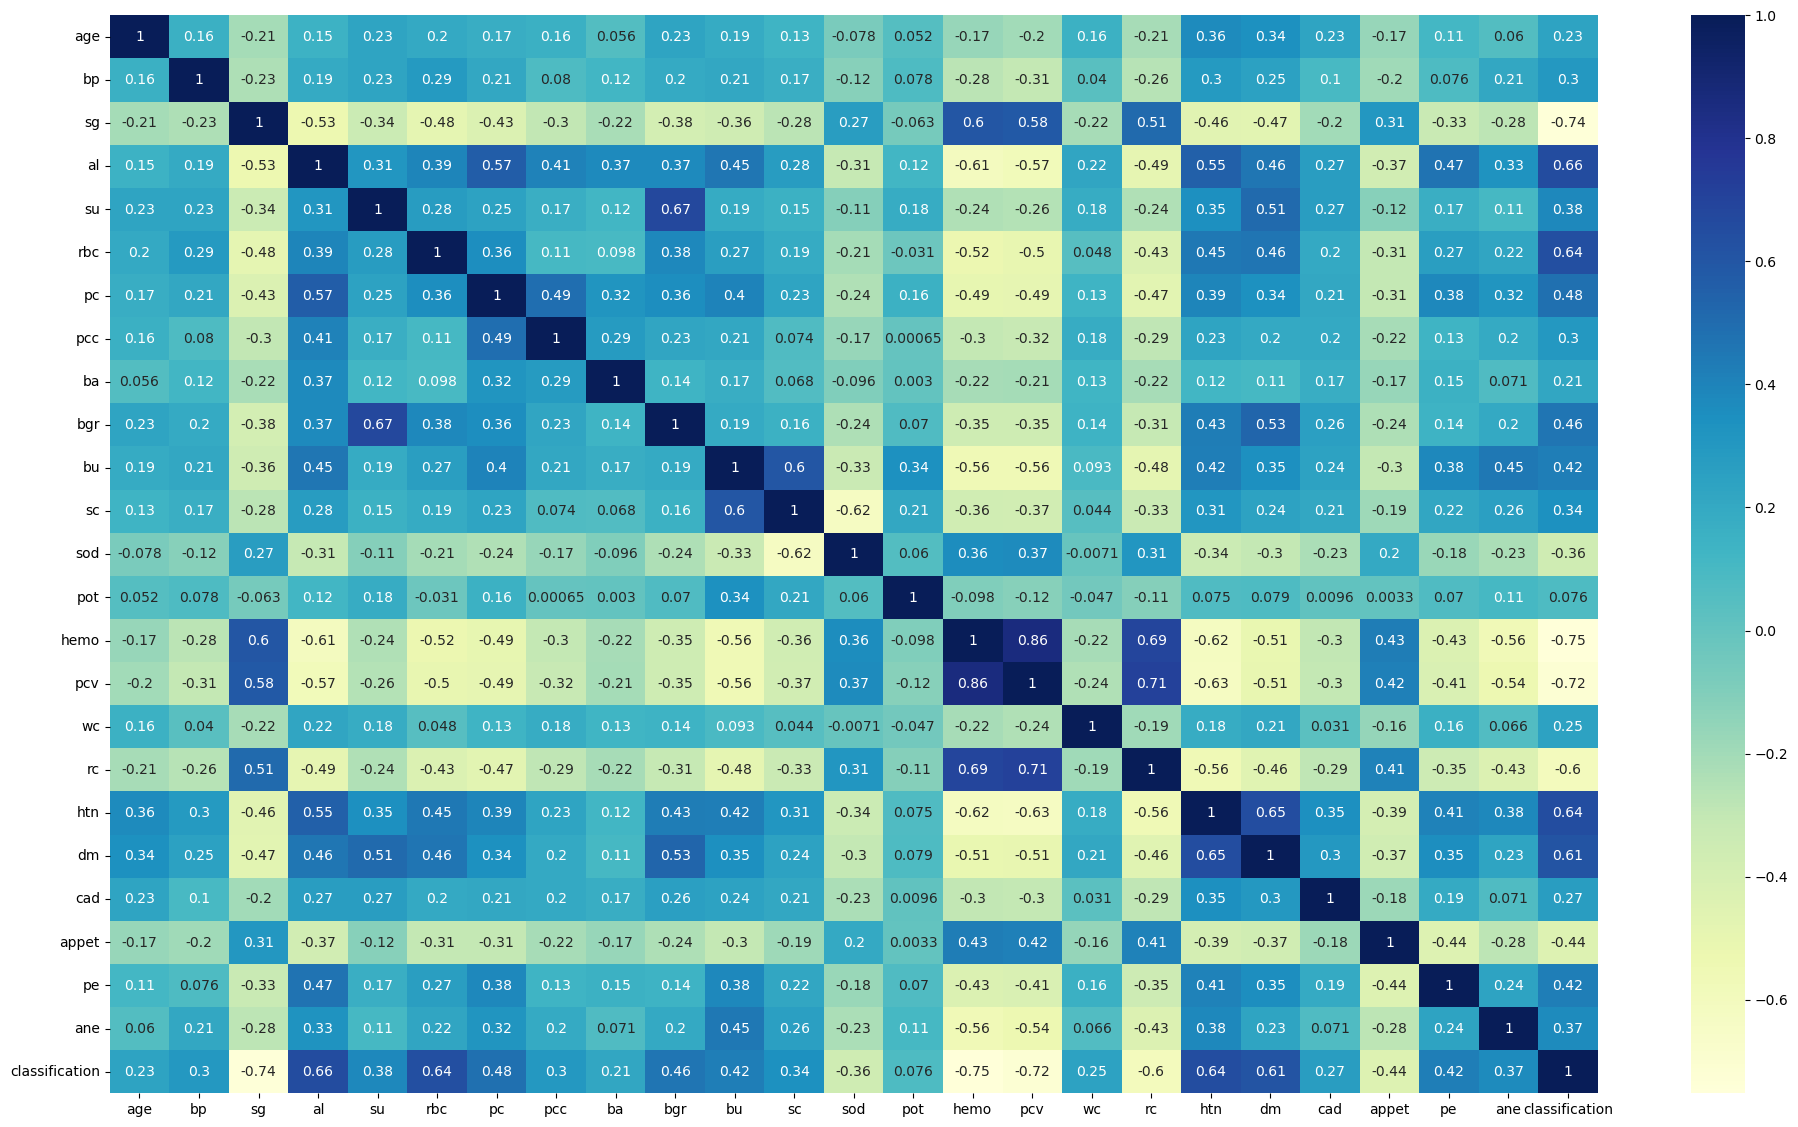

In [50]:
plt.figure(figsize=(24,14))
sns.heatmap(dataset.corr(),annot=True,cmap='YlGnBu')
plt.show()

We clearly see that 'pcv' and 'hemo' feature has 85% multicollinearity. 
So we remove one of the feature i.e. pcv

In [51]:
dataset.drop('pcv',axis=1, inplace=True)

In [52]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.533333,0.444444,0.995122,0.2,0.0,0.2,0.0,0.0,0.0,0.246939,0.092072,0.015789,0.844172,0.089362,0.865169,0.295455,0.6500,1.0,1.0,0.0,1.0,0.0,0.0,1
1,0.077778,0.277778,0.995122,0.8,0.0,0.4,0.0,0.0,0.0,0.230612,0.046036,0.010526,0.839264,0.083404,0.634831,0.227273,0.6200,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.688889,0.444444,0.985366,0.4,0.6,0.0,0.0,0.0,0.0,0.863265,0.135550,0.023684,0.820859,0.089362,0.539326,0.284091,0.4750,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0.533333,0.388889,0.980488,0.8,0.0,0.0,1.0,1.0,0.0,0.238776,0.143223,0.050000,0.680982,0.053191,0.629213,0.253788,0.4875,1.0,0.0,0.0,0.0,1.0,1.0,1
4,0.566667,0.444444,0.985366,0.4,0.0,0.0,0.0,0.0,0.0,0.216327,0.066496,0.018421,0.849080,0.084681,0.651685,0.276515,0.5750,0.0,0.0,0.0,1.0,0.0,0.0,1


In [53]:
#Independent and dependent feature
X=dataset.iloc[:,:-1]
y=dataset['classification']

In [54]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane
0,0.533333,0.444444,0.995122,0.2,0.0,0.2,0.0,0.0,0.0,0.246939,0.092072,0.015789,0.844172,0.089362,0.865169,0.295455,0.6500,1.0,1.0,0.0,1.0,0.0,0.0
1,0.077778,0.277778,0.995122,0.8,0.0,0.4,0.0,0.0,0.0,0.230612,0.046036,0.010526,0.839264,0.083404,0.634831,0.227273,0.6200,0.0,0.0,0.0,1.0,0.0,0.0
2,0.688889,0.444444,0.985366,0.4,0.6,0.0,0.0,0.0,0.0,0.863265,0.135550,0.023684,0.820859,0.089362,0.539326,0.284091,0.4750,0.0,1.0,0.0,0.0,0.0,1.0
3,0.533333,0.388889,0.980488,0.8,0.0,0.0,1.0,1.0,0.0,0.238776,0.143223,0.050000,0.680982,0.053191,0.629213,0.253788,0.4875,1.0,0.0,0.0,0.0,1.0,1.0
4,0.566667,0.444444,0.985366,0.4,0.0,0.0,0.0,0.0,0.0,0.216327,0.066496,0.018421,0.849080,0.084681,0.651685,0.276515,0.5750,0.0,0.0,0.0,1.0,0.0,0.0


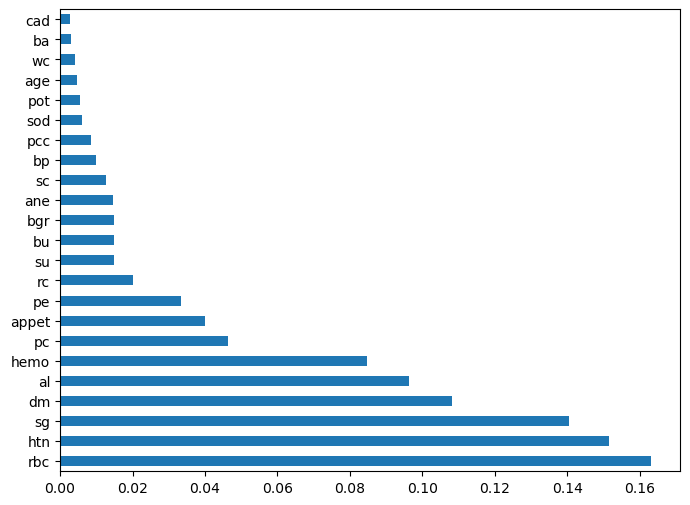

In [55]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
plt.figure(figsize=(8,6))
ranked_features = pd.Series(model.feature_importances_, index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

Take top 10 features only

In [56]:
ranked_features.nlargest(10).index

Index(['rbc', 'htn', 'sg', 'dm', 'al', 'hemo', 'pc', 'appet', 'pe', 'rc'], dtype='object')

In [57]:
x=dataset[['sg', 'rbc', 'dm', 'htn', 'al', 'hemo', 'pc', 'appet','pe','rc']]
x.head()

,sg,rbc,dm,htn,al,hemo,pc,appet,pe,rc
0,0.995122,0.2,1.0,1.0,0.2,0.865169,0.0,1.0,0.0,0.6500
1,0.995122,0.4,0.0,0.0,0.8,0.634831,0.0,1.0,0.0,0.6200
2,0.985366,0.0,1.0,0.0,0.4,0.539326,0.0,0.0,0.0,0.4750
3,0.980488,0.0,0.0,1.0,0.8,0.629213,1.0,0.0,1.0,0.4875
4,0.985366,0.0,0.0,0.0,0.4,0.651685,0.0,1.0,0.0,0.5750


In [58]:
x.tail()

,sg,rbc,dm,htn,al,hemo,pc,appet,pe,rc
495,1.000000,0.0,0.0,0.0,0.0,0.824017,0.0,1.0,0.0,0.693671
496,0.998493,0.0,0.0,0.0,0.0,0.786517,0.0,1.0,0.0,0.759555
497,0.997330,0.0,0.0,0.0,0.0,0.834003,0.0,1.0,0.0,0.699181
498,0.995122,0.0,0.0,0.0,0.0,0.810764,0.0,1.0,0.0,0.605263
499,1.000000,0.0,0.0,0.0,0.0,0.907155,0.0,1.0,0.0,0.779868


In [59]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=33)

In [72]:
print(X_train.shape)
print(X_test.shape)

(400, 10)
(100, 10)


# Model 1 : Support Vector Machine

Accuracy:  0.98
[[54  1]
 [ 1 44]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.98      0.98      0.98        45

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



<AxesSubplot:>

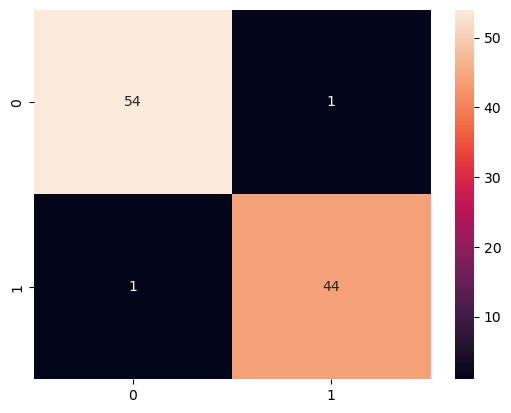

In [73]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'poly',degree=4, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 

cf=confusion_matrix(y_test,y_pred)
print("Accuracy: ", accuracy_score(y_test,y_pred))
print(cf)
print(classification_report(y_test,y_pred))
sns.heatmap(cf,annot=True)

# Model 2: K Nearest Neighbor

C:\Users\Sun\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy:  0.98
[[54  1]
 [ 1 44]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.98      0.98      0.98        45

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



<AxesSubplot:>

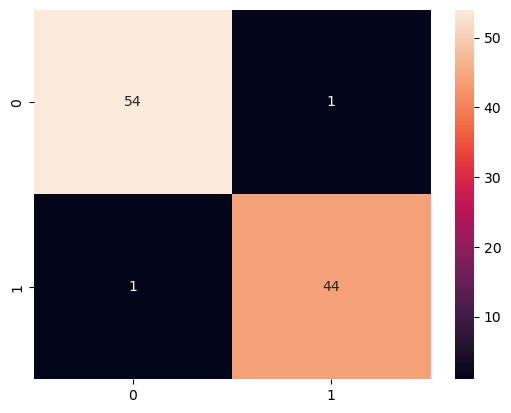

In [75]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski' )  
classifier.fit(X_train, y_train)
y_pred1= classifier.predict(X_test)  

cf1=confusion_matrix(y_test,y_pred1)
print("Accuracy: ", accuracy_score(y_test,y_pred1))
print(cf1)
print(classification_report(y_test,y_pred1))
sns.heatmap(cf1,annot=True)

# Model 3: Decision Tree

Accuracy:  0.95
[[50  5]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        55
           1       0.90      1.00      0.95        45

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



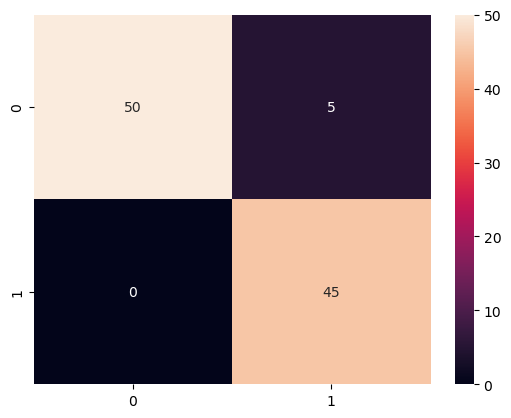

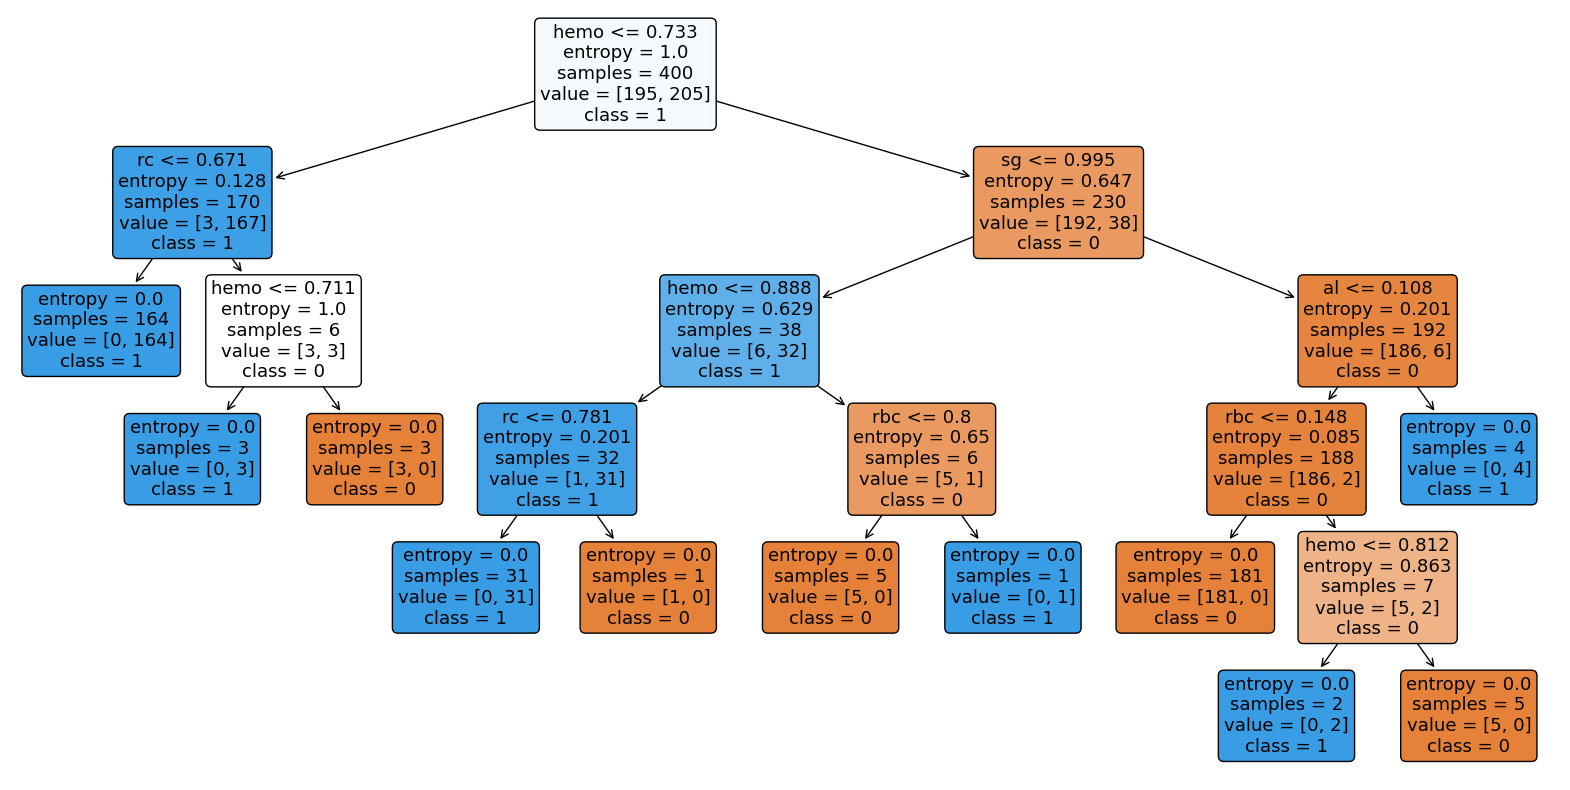

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
tree_clf = DecisionTreeClassifier(criterion='entropy',max_depth=8)
tree_clf.fit(X_train, y_train)
y_pred2=tree_clf.predict(X_test)

cf2=confusion_matrix(y_test,y_pred2)
print("Accuracy: ", accuracy_score(y_test,y_pred2))
print(cf2)
print(classification_report(y_test,y_pred2))
sns.heatmap(cf2,annot=True)
f=['sg', 'rbc', 'dm', 'htn', 'al', 'hemo', 'pc', 'appet','pe','rc']
t=['classification']

plt.figure(figsize=(20,10))
plot_tree(tree_clf, 
          feature_names=f,  
          class_names=[str(i) for i in tree_clf.classes_], 
          filled=True, 
          rounded=True)
plt.show()

# Model 4: Random Forest

Accuracy:  0.98
[[53  2]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        55
           1       0.96      1.00      0.98        45

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



<AxesSubplot:>

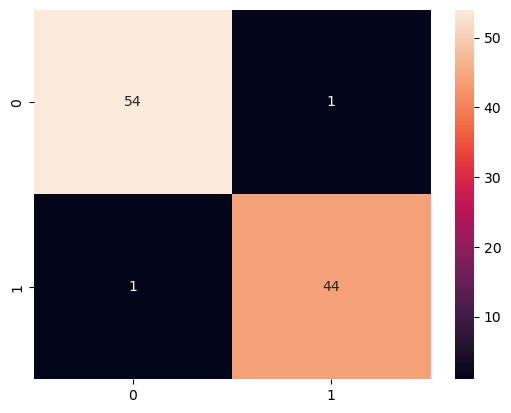

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred3 = rf_classifier.predict(X_test)
cf3=confusion_matrix(y_test,y_pred3)
print("Accuracy: ", accuracy_score(y_test,y_pred3))
print(cf3)
print(classification_report(y_test,y_pred3))
sns.heatmap(cf,annot=True)